# [NTDS'18] milestone 2: network models
[ntds'18]: https://github.com/mdeff/ntds_2018

[Hermina Petric Maretic](https://people.epfl.ch/hermina.petricmaretic), [EPFL LTS4](https://lts4.epfl.ch)

## Students

* Team: `28`
* Students: `Guillain, Léonore Valentine; Pase, Francesco; Rusu, Cosmin-Ionut; Zhuang, Ying`
* Dataset: `Flight Routes`

## Rules

* Milestones have to be completed by teams. No collaboration between teams is allowed.
* Textual answers shall be short. Typically one to two sentences.
* Code has to be clean.
* In the first part, you cannot import any other library than we imported. In the second part, you are allowed to import any library you want.
* When submitting, the notebook is executed and the results are stored. I.e., if you open the notebook again it should show numerical results and plots. We won't be able to execute your notebooks.
* The notebook is re-executed from a blank state before submission. That is to be sure it is reproducible. You can click "Kernel" then "Restart & Run All" in Jupyter.

## Objective

The purpose of this milestone is to explore various random network models, analyse their properties and compare them to your network. In the first part of the milestone you will implement two random graph models and try to fit them to your network. In this part you are not allowed to use any additional package. In the second part of the milestone you will choose a third random graph model that you think shares some properties with your network. You will be allowed to use additional packages to construct this network, but you must explain your network choice. Finally, make your code as clean as possible, and keep your textual answers short.

## Part 0

Import the adjacency matrix of your graph that you constructed in milestone 1, as well as the number of nodes and edges of your network.

In [1]:
import numpy as np
import pandas as pd

adjacency = np.load('adjacency.npy') # the adjacency matrix
n_nodes =  adjacency.shape[0] # the number of nodes in the network
n_edges =  np.where(adjacency > 0, 1, 0).sum() / 2 # the number of edges in the network

## Part 1

**For the computation of this part of the milestone you are only allowed to use the packages that have been imported in the cell below.**

In [2]:
%matplotlib inline

import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy

### Question 1

Create a function that constructs an Erdős–Rényi graph.

In [3]:
def erdos_renyi(n, p, seed = None):
    """Create an instance from the Erdos-Renyi graph model.
    
    Parameters
    ----------
    n: int
        Size of the graph.
    p: float
        Edge probability. A number between 0 and 1.
    seed: int (optional)
        Seed for the random number generator. To get reproducible results.
    
    Returns
    -------
    adjacency
        The adjacency matrix of a graph.
    """
    
    # Your code here.
 
    
    
    np.random.seed(seed)
    adjacency = np.zeros((n,n))
    
    for i in range(n):
        # add the +1 to avoid selfloops
        adjacency[i, i+1:] = np.random.binomial(1, p, n-i-1)
        adjacency[i+1:, i] = adjacency[i, i+1:]
    
    
    return adjacency

Text(0.5,1.05,'Erdos-Renyi (5, 0.6)')

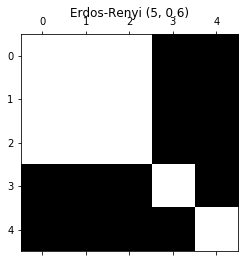

In [4]:
er = erdos_renyi(5, 0.6, 9765)
plt.spy(er)
plt.title('Erdos-Renyi (5, 0.6)')

Text(0.5,1.05,'Erdos-Renyi (10, 0.4)')

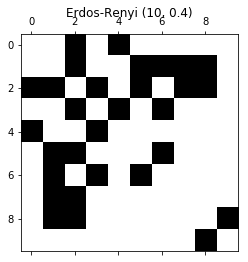

In [5]:
er = erdos_renyi(10, 0.4, 7648)
plt.spy(er)
plt.title('Erdos-Renyi (10, 0.4)')

### Question 2

Use the function to create a random Erdos-Renyi graph. Choose the parameters such that number of nodes is the same as in your graph, and the number of edges similar. You don't need to set the random seed. Comment on your choice of parameters.

In [6]:
# calculation of probability
p = 2*n_edges/(n_nodes*(n_nodes-1))
print('Connection propabiblity :  ', p)

Connection propabiblity :   0.0036852923458718925


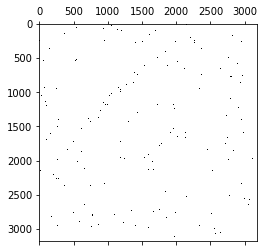

In [7]:
er_graph = erdos_renyi(n_nodes, p)
plt.spy(er_graph)

In [8]:
print('Edges in Erdos-Renyi graph : {} \nEdges in our graph : {}'.format(er_graph.sum()/2, n_edges))

Edges in Erdos-Renyi graph : 18695.0 
Edges in our graph : 18616.0


**Your answer here.**

The number of links in a Erdos-Renyi graph will be $L=p* N(N-1)/2$ for a given $p$, hence we choose $p = 2*L/(N*(N-1))$. We see that the resulting number of edges is indeed similar to the one in our network.

### Question 3

Create a function that constructs a Barabási-Albert graph.

In [9]:
def barabasi_albert(n, m, seed=None, m_0 = None):
    """Create an instance from the Barabasi-Albert graph model.
    
    Parameters
    ----------
    n: int
        Size of the graph.
    m: int
        Number of edges to attach from a new node to existing nodes.
    seed: int (optional)
        Seed for the random number generator. To get reproducible results.
    m_0: int (optinal)
        The number of nodes in the initial connected component
    
    Returns
    -------
    adjacency
        The adjacency matrix of a graph.
    """
    
    np.random.seed(seed)
    
    #to ensure scale free network property
    m_0 = max(m, 2)

    # Initial connected network
    adjacency = np.zeros((n,n))

    
    #Generating random subgraph of size m_0 x m_0
    adjacency[:m_0, :m_0] = erdos_renyi(m_0, 1./m_0 , seed)

    #Force Connectivity
    for i in range(m_0-1):
        adjacency[i, i+1] = 1;
        adjacency[i+1, i] = 1;
    
    
    #iterate:
    for i in range(m_0, n):
        degrees = adjacency[:i].sum(axis = 1)
        total = degrees.sum()
        
        new_links = np.random.choice(i, size=m, replace=False, p = degrees / total)
        adjacency[i, new_links] = 1.
        adjacency[new_links, i] = 1.
    
    return adjacency

Text(0.5,1.05,'Barabasi-Albert (5, 1)')

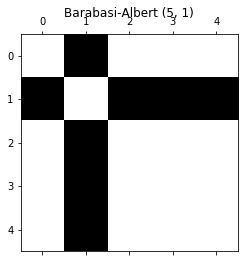

In [10]:
ba = barabasi_albert(5, 1, 908)
plt.spy(ba)
plt.title('Barabasi-Albert (5, 1)')

Text(0.5,1.05,'Barabasi-Albert (10, 2)')

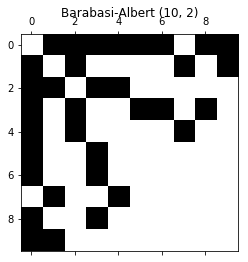

In [11]:
ba = barabasi_albert(10, 2, 8708)
plt.spy(ba)
plt.title('Barabasi-Albert (10, 2)')

### Question 4

Use the function to create a random Barabási-Albert graph. Choose the parameters such that number of nodes is the same as in your graph, and the number of edges similar. You don't need to set the random seed. Comment on your choice of parameters.

In [12]:
avg_degree = np.where(adjacency > 0, 1, 0).sum(axis = 1).mean()
print('The average degree of our graph is: ', avg_degree)

The average degree of our graph is:  11.711859075180875


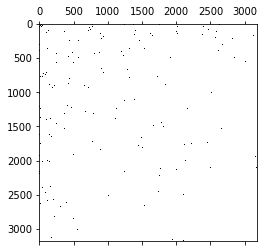

In [13]:
# Your code here.
ba_graph = barabasi_albert(n_nodes, 6)
plt.spy(ba_graph)

In [14]:
print("Number of edges in Barabási-Albert graph: {}\nNumber of edges in our graph: {}"
      .format( ba_graph.sum()/2, n_edges))

Number of edges in Barabási-Albert graph: 19045.0
Number of edges in our graph: 18616.0


**Your answer here**

We calcuate $m$ so that the random Barabási-Albert graph we create has a similar number of edges as our network. The algorithm will create approximately $mt + m_0$ links, with $t= n-m_0$.
We obtain $L= m*n-m*m_0+m_0$, as the $m_0 = m$ in our implementation, we get that 6 is the closest integer to give the desired results.



### Question 5

Compare the number of edges in all three networks (your real network, the Erdős–Rényi network, and the Barabási-Albert netowk).

Number of edges in the real network: 18616.0
Number of edges in the Erdős–Rényi network: 18695.0
Number of edges in the Barabási-Albert network: 19045.0


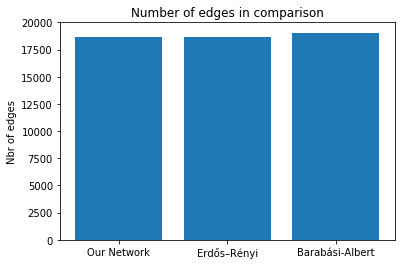

In [15]:
# Your code here.
print(f"Number of edges in the real network: {n_edges}")
print(f"Number of edges in the Erdős–Rényi network: {er_graph.sum() / 2}")
print(f"Number of edges in the Barabási-Albert network: {ba_graph.sum() / 2}")

plt.title('Number of edges in comparison')
plt.ylabel('Nbr of edges')
_ = plt.bar(['Our Network', 'Erdős–Rényi', 'Barabási-Albert'], [n_edges, er_graph.sum() / 2, ba_graph.sum() / 2])

### Question 6

Implement a function that computes the [Kullback–Leibler (KL) divergence](https://en.wikipedia.org/wiki/Kullback%E2%80%93Leibler_divergence) between two probability distributions.
We'll use it to compare the degree distributions of networks.

In [16]:
def kl_divergence(p, q):
    """Compute the KL divergence between probability distributions of degrees of two networks.
    
    Parameters
    ----------
    p: np.array
        Probability distribution of degrees of the 1st graph.
    q: np.array
        Probability distribution of degrees of the 2nd graph.
    
    Returns
    -------
    kl
        The KL divergence between the two distributions.
    """
    
    assert p.shape == q.shape
    #check that we have the same support
    np.testing.assert_array_equal(np.where(p>0), np.where(q>0), err_msg='The two distributions have different supports')
    
    kl = 0
    for x, p_x in enumerate(p):
        kl += p_x*np.log(p_x/q[x])
    
    return kl

In [17]:
p_test = np.array([0.2, 0.2, 0.2, 0.4])
q_test = np.array([0.3, 0.3, 0.1, 0.3])

kl_divergence(p_test, q_test)

0.09151622184943575

### Question 7

Compare the degree distribution of your network to each of the two synthetic ones, in terms of KL divergence. **Hint:** Make sure you normalise your degree distributions to make them valid probability distributions.

In [18]:
# Your code here.
def get_degree_distribution(adjacency):
    degrees = adjacency.sum(axis = 1)
    #Use histogram with number of bins = degree range to get distribution
    degree_network = np.histogram(degrees, bins=int((degrees.max()+1)-degrees.min()))
    return degree_network[0], degrees
    
#calculate degree distrubution for each graph
degree_network, degrees = get_degree_distribution(np.where(adjacency > 0, 1, 0))
degree_er_network, degrees_er = get_degree_distribution(er_graph)
degree_ba_network, degrees_ba = get_degree_distribution(ba_graph)

deg= np.array([degrees, degrees_er, degrees_ba])
min_s = deg.min(axis=1)
max_s = deg.max(axis=1)
degree_networks_ = [degree_network, degree_er_network, degree_ba_network]

In [19]:
#pad arrays to have same length
def pad_distribution(degree_network, degrees ,min_s,max_s):
    mi = degrees.min()
    ma = degrees.max()
    before_pad = int(mi - min(min_s))
    after_pad = int( max(max_s) - ma)
    return np.pad(degree_network, pad_width=(before_pad, after_pad), mode='constant', constant_values = 0)
    
for i, d in enumerate(deg):
    degree_networks_[i] = pad_distribution(degree_networks_[i], d, min_s, max_s)

In [20]:
def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / float(N)

#normalize
def normalize(degree_networks):
    tmp = []
    for n in degree_networks:

        #to avoid issues with log at zero, affects accuracy only in order of 1e-3
        n += 1

        #alternative smoothing, we still would have issues with zero
        #we find moving average to be sufficient
        #alternative smoothing, we still would have issues with zero
        #scp = scipy.interpolate.UnivariateSpline(range(min(min_s), max(max_s)+1), n)
        #n = scp(range(min(min_s), max(max_s)+1))

        #do moving average to smooth function slightly
        N = n.shape[0]
        n = running_mean(n, 3)
        n = n/ n.sum()
        tmp.append(n)
    return tmp
    
degree_networks = normalize(degree_networks_)

In [21]:
print(f"KL Divergence between the original network and the Erdős–Rényi network: {kl_divergence(degree_networks[0], degree_networks[1])}")
print(f"KL Divergence between the original network and the Barabási-Albert network: {kl_divergence(degree_networks[0], degree_networks[2])}")

KL Divergence between the original network and the Erdős–Rényi network: 2.162958533502317
KL Divergence between the original network and the Barabási-Albert network: 2.721647747046499


In [22]:
#If we look only at degrees >= 5
tmp = []
copy = degree_networks_.copy()

for n in copy:
    n = n[5:]
    n = n/ n.sum()
    tmp.append(n)
    
degree_networks_2 = tmp

In [23]:
print(f"KL Divergence between the original network and the Erdős–Rényi network: \
    {kl_divergence(degree_networks_2[0], degree_networks_2[1])}")
print(f"KL Divergence between the original network and the Barabási-Albert network: \
    {kl_divergence(degree_networks_2[0], degree_networks_2[2])}")

KL Divergence between the original network and the Erdős–Rényi network:     0.9695887865890208
KL Divergence between the original network and the Barabási-Albert network:     0.49487144499708025


### Question 8

Plot the degree distribution historgrams for all three networks. Are they consistent with the KL divergence results? Explain.

In [24]:
def custom_scatter_histogram(degree_dist, title='Degree distribution of our network', alpha=1, ylim = (0.0001, 0.3)):
    p = plt.scatter(range(len(degree_dist)), degree_dist, alpha=alpha)
    if title:
        plt.title(title)
    plt.yscale("log")
    plt.xlabel('degree')
    plt.ylabel('probability')
    plt.ylim(ylim)
    return p

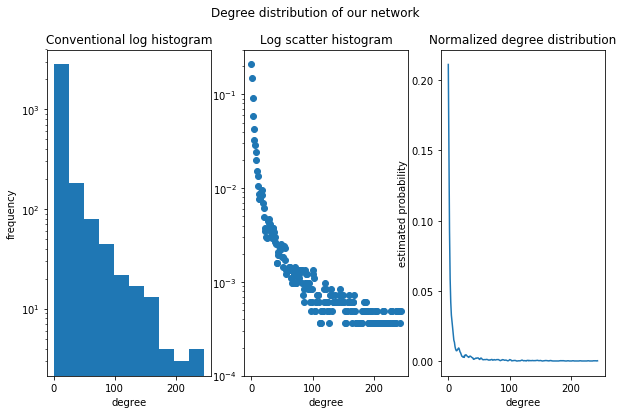

In [25]:
# Your code here.
plt.figure(figsize=(10, 6))
plt.suptitle('Degree distribution of our network ')

plt.subplot(132)
custom_scatter_histogram(degree_networks[0])
plt.title('Log scatter histogram')

plt.subplot(131)
plt.title('Conventional log histogram')
plt.hist(np.where(adjacency > 0, 1, 0).sum(axis=1), log=True)
plt.xlabel('degree')
plt.ylabel('frequency')

plt.subplot(133)
plt.title('Normalized degree distribution')
plt.plot(degree_networks[0])
plt.xlabel('degree')
plt.ylabel('estimated probability')

plt.show()

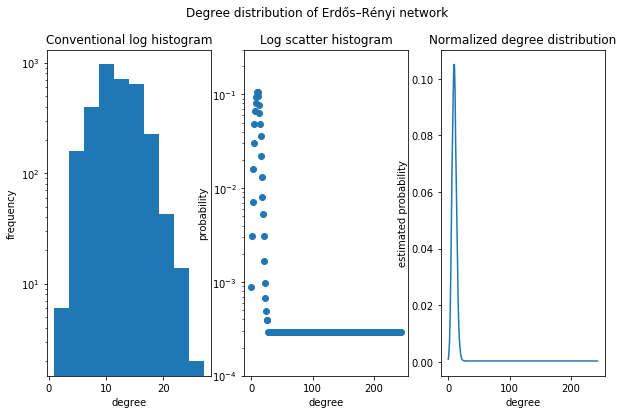

In [26]:
# Your code here.
plt.figure(figsize=(10, 6))
plt.suptitle('Degree distribution of Erdős–Rényi network')

plt.subplot(131)
plt.title('Conventional log histogram')
plt.hist(er_graph.sum(axis=1), log=True)
plt.xlabel('degree')
plt.ylabel('frequency')

plt.subplot(132)
custom_scatter_histogram(degree_networks[1])
plt.title('Log scatter histogram')

plt.subplot(133)
plt.title('Normalized degree distribution')
plt.plot(degree_networks[1])
plt.xlabel('degree')
plt.ylabel('estimated probability')

plt.show()

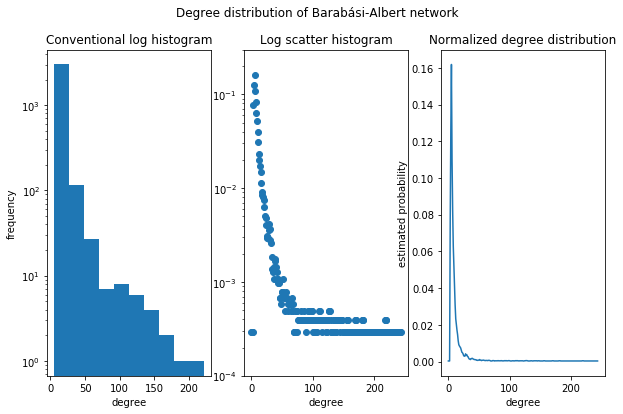

In [27]:
plt.figure(figsize=(10, 6))
plt.suptitle('Degree distribution of Barabási-Albert network')

plt.subplot(132)
custom_scatter_histogram(degree_networks[2])
plt.title('Log scatter histogram')

plt.subplot(131)
plt.title('Conventional log histogram')
plt.hist(ba_graph.sum(axis=1), log=True)
plt.xlabel('degree')
plt.ylabel('frequency')

plt.subplot(133)
plt.title('Normalized degree distribution')
plt.plot(degree_networks[2])
plt.xlabel('degree')
plt.ylabel('estimated probability')

plt.show()

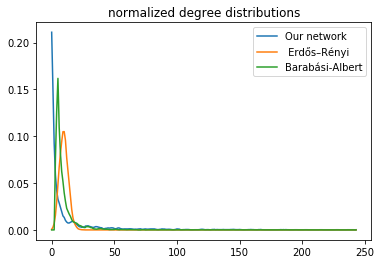

In [28]:
plt.title('normalized degree distributions')
for i in degree_networks:
    plt.plot(i)
    
plt.legend(['Our network', ' Erdős–Rényi', 'Barabási-Albert'])

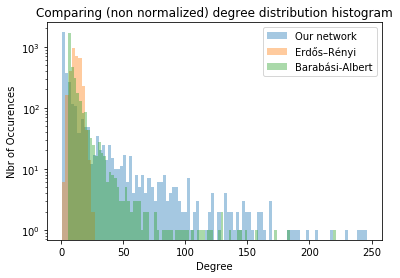

In [44]:
# Your code here.
plt.title('Comparing (non normalized) degree distribution histogram')
plt.xlabel('Degree')
plt.ylabel('Nbr of Occurences')
plt.hist(np.where(adjacency > 0, 1, 0).sum(axis = 1), alpha=0.4, bins=100)
plt.hist(er_graph.sum(axis=1), alpha=0.4, log=True)
plt.hist(ba_graph.sum(axis=1), alpha=0.4, bins=100)
plt.legend(['Our network', 'Erdős–Rényi', 'Barabási-Albert'])
plt.show()

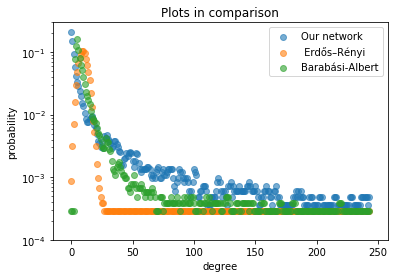

In [30]:
plt.title('Comparing degree distribution scatter histogram')
plt.xlabel('Degree')
plt.ylabel('Nbr of Occurences')
for i in degree_networks:
    custom_scatter_histogram(i, alpha=0.6, title='Plots in comparison')
    
    
plt.legend(['Our network', ' Erdős–Rényi', 'Barabási-Albert'])
plt.show()

**Your answer here.**

We can clearly see that the overall shape of the Barabási-Albert degree distribution is more similar to our model than the Erdős–Rényi degree distribution. The KL-values over the whole distribution do not reflect this. 
By removing the first 5 values, we see that the KL for this now reflect that Barabási-Albert model is indeed more similar to our model. The offset in small degree values (no nodes of degree <m ) in Barabási-Albert model causes this discrepancy.


### Question 9

Imagine you got equal degree distributions. Would that guarantee you got the same graph? Explain.

If we have the same degree distrubtion, this does not mean that we have the same graph. 

If two graphs have same degree sequence, that does not mean that the graphs are isomorphic, hence they may not be the same. 

To prove this, consider the following counter example: 
These two have the same degree distribution but are not isomorphic : {1: 2, 2: 3}

```
* 1 -- 2 -- 3 -- 4 -- 5
* 1 -- 2   3 -- 4
             \ /
              5
```

## Part 2

**You are allowed to use any additional library here (e.g., NetworkX, PyGSP, etc.).** Be careful not to include something here and use it in part 1!

In [31]:
import networkx as nx

### Question 10

Choose a random network model that fits you network well. Explain your choice. 

**Hint:** Check lecture notes for different network models and their properties. Your choice should be made based on at least one property you'd expect to be similar.

From the previous extercises we see that our network follows a power law distribution. As we saw in class such distributions emerge whenever both growth and preferential attachment come into play. 
Moreover, not only do these comonents give raise mathematically to the desired distribution, but they also model the behaviour that gave rise to the real network.

Very popular airports represent economical and social hubs in our society. As a consequence, they are more likely to get new links (addition of a new direct flight) whenever new companies and/or airports join the network. We chose then to reproduce a network with a similar degree distribution shape, maintaining the same number of nodes and similar number of edges.

### Question 11

Explain (in short) how the chosen model works.

**Answer**

As we can see above, the Barabasi Albert model with similar number of edges as our network has smaller hubs than ours. In the above Barabasi Albert model, preferential attchment ($\alpha$) is equal to $1$, meaning that the probability for a new node to create a link with older nodes is linear in the node degree. 

The occurene of larger hubs in our network indicates that we need a model that can generate networks with super linear preferential attachment.
In order to come up with such model we decided to slightly modify the Barabasi-Albert algorithm. Another consideration refers to low degree nodes: in order to get more low degree nodes (as we have in our network) our model starts with high value for $m_0$ (initial poorly connected nodes).

The algorithm is fairly simple:

1. Create a single connected component of $m_0$ nodes.
2. For every new node (until we reached the number of nodes we want):
    1. Create links to ($m <<= m_0$) already existing nodes with probabilities proportional to the degree of the existing node elevated at some esponent $\alpha$, i.e.
    $$p_i = \frac{degree_i^{\alpha}}{\sum_{j \in S}{degree_j^{\alpha}}} \text{ where } S \text{ is the set of existing nodes} $$


### Question 12

Create a random graph from that model, such that the number of nodes is the same as in your graph.

In [32]:
def preferential_attachment(n, m, seed=None, m_0 = None, alpha = 1):
    """Create an instance from the Barabasi-Albert graph model.
    
    Parameters
    ----------
    n: int
        Size of the graph.
    m: int
        Number of edges to attach from a new node to existing nodes.
    seed: int (optional)
        Seed for the random number generator. To get reproducible results.
    m_0: int (optinal)
        The number of nodes in the initial connected component
    
    Returns
    -------
    adjacency
        The adjacency matrix of a graph.
    """
    
    np.random.seed(seed)
    # Initial connected network
    adjacency = np.zeros((n,n))
    

    
    adjacency[:m_0, :m_0] = erdos_renyi(m_0, 1./(10*m_0) , seed)
    #Should it also be connected ??
    for i in range(m_0-1):
        adjacency[i, i+1] = 1;
        adjacency[i+1, i] = 1;
    #iterate:
    for i in range(m_0, n):
        degrees = adjacency[:i].sum(axis = 1)
        total = (degrees**alpha).sum()
        
        new_links = np.random.choice(i, size=m, replace=False, p = degrees**alpha / total)
        adjacency[i, new_links] = 1.
        adjacency[new_links, i] = 1.
    
    return adjacency

In [33]:
# These values were heuristically to tuned to obtain a fair representation of our netowrk
preferential = preferential_attachment(n_nodes, m=7, m_0 = 500, alpha = 1.32)

In [42]:
print(f"Our network number of nodes: {n_nodes} \nEdges: {n_edges}")
print(f"New random network number of nodes: {preferential.shape[0]} \nEdges: {preferential.sum() / 2}")

Our network number of nodes: 3179 
Edges: 18616.0
New random network number of nodes: 3179 
Edges: 19276.0



### Question 13

Check the properties you expected to be similar, and compare to your network.

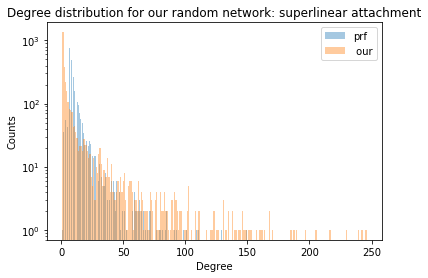

In [35]:
# Your code here.
one_adjacency = np.where(adjacency > 0, 1, 0)
x = one_adjacency.sum(axis = 1)
degree_pref_network = preferential.sum(axis = 1)


plt.title('Degree distribution for our random network: superlinear attachment')
plt.hist(degree_pref_network, bins = 237, alpha=0.4, log = True)
plt.hist(x, bins = 237, alpha=0.4, log = True)
plt.xlabel('Degree')
plt.ylabel('Counts')
plt.legend(['prf',' our'])
plt.show()

KL Divergence between the original network and the Barabasi Albert network: 1.1193548560864717


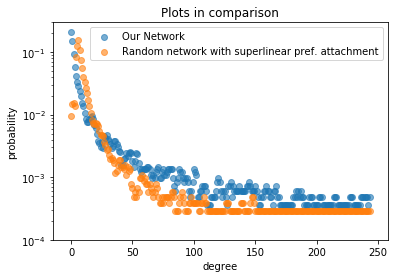

In [36]:
#Manipulating the distributions to compute KL Divergence and compare the networks
de, pref_ = get_degree_distribution(preferential)
degree_network, degrees = get_degree_distribution(np.where(adjacency > 0, 1, 0))

deg= np.array([degrees, pref_])
min_s = deg.min(axis=1)
max_s = deg.max(axis=1)
degree_networks_ = [degree_network, de]

for i, d in enumerate(deg):
    degree_networks_[i] = pad_distribution(degree_networks_[i], d, min_s, max_s)
    
degree_networks = normalize(degree_networks_)

    
for i in degree_networks:
    custom_scatter_histogram(i, alpha=0.6, title='Plots in comparison')
    
plt.legend(['Our Network', 'Random network with superlinear pref. attachment'])

print(f"KL Divergence between the original network and the Random network with superlinear preferential attachment: {kl_divergence(degree_networks[0], degree_networks[1])}")

**Your answer here.**

We can see from the plot that the two distribution are very similar indeed the KL Divergence has more than halved with respect to those of both models presented in Part 1.

Actually the point were the two distriutions differ the most is again in the low degree nodes. It is indeed quite difficult to obtain such preferential attachment with a growing model that ends up having many low degree nodes as in our network.

$\textbf{Networkx tool}$

To fill that gap, we looked for different generating methods in the networkx libraries. All "growing" model presented similar problem in the low degree nodes so we decided to test the method $\textit{nx.expected_degree_graph()}$ that generates random networks starting from the array representing, for every nodes, its degree. The model does not make use of "growth" but it just creates a link between two nodes $i$ and $j$ with probability:

$$ p_{ij} = \frac{k_ik_j}{\sum_{t}{k_t}}, \text{ where } k_t \text{ is the degree of node $t$}. $$


Our network number of nodes: 3179 and edges: 18616.0
New model network number of nodes: 3179 and edges: 18699


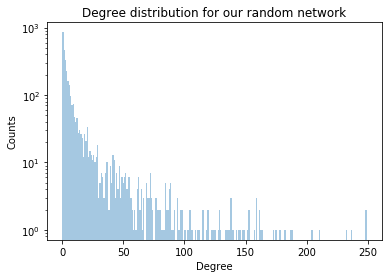

In [37]:
# Your code here.
random_graph = nx.expected_degree_graph(list(degrees), selfloops=False)
#Create degrees vector
degree_random = [d for n, d in random_graph.degree()]


print(f"Our network number of nodes: {n_nodes} and edges: {n_edges}")
print(f"New model network number of nodes: {random_graph.number_of_nodes()} and edges: {random_graph.number_of_edges()}")

plt.title('Degree distribution for our random network')
plt.hist(degree_random, bins = 237, alpha=0.4, log = True)

plt.xlabel('Degree')
plt.ylabel('Counts')
plt.show()


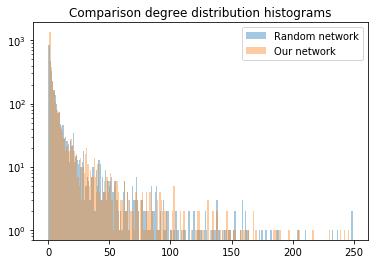

In [38]:
# Your code here.
plt.title('Comparison degree distribution histograms')
plt.hist(degree_random, alpha=0.4, log=True, bins=237)

plt.hist(np.where(adjacency > 0, 1, 0).sum(axis=1), alpha=0.4, bins=237)
plt.legend(['Random network', 'Our network'])
plt.show()


In [39]:
degree_network_random_new, degree_random_new  = get_degree_distribution(nx.to_numpy_array(random_graph))
degree_network, degrees = get_degree_distribution(one_adjacency)

KL Divergence between the original network and the random network: 0.02038173033880967


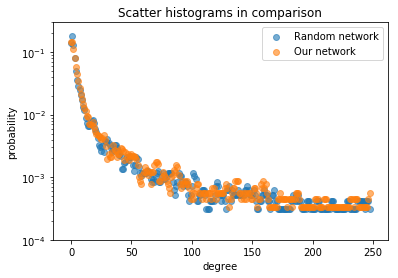

In [45]:
deg= np.array([degrees, degree_random_new])
min_s = deg.min(axis=1)
max_s = deg.max(axis=1)
degree_networks_ = [degree_network, degree_network_random_new]

for i, d in enumerate(deg):
    degree_networks_[i] = pad_distribution(degree_networks_[i], d, min_s, max_s)
    

#normalize to view better dist
    
degree_networks = normalize(degree_networks_)

    
for i in degree_networks:
    custom_scatter_histogram(i, alpha=0.6, title='Scatter histograms in comparison')
    
plt.legend(['Random network', 'Our network'])

print(f"KL Divergence between the original network and the random network: {kl_divergence(degree_networks[0], degree_networks[1])}")

**Your answer here.**

We can see that now the two distributions overlap in nearly all points and the KL Divergence is very small.